# Pandas

[Pandas](https://pandas.pydata.org/) is a widely used Python library for storing and manipulating tabular data, where feature columns may be of different types (e.g., scalar, ordinal, categorical, text). We give some examples of how to use it below.

For very large datasets, you might want to use [modin](https://github.com/modin-project/modin), which provides the same pandas API but scales to multiple cores, by using [dask](https://github.com/dask/dask) or [ray](https://github.com/ray-project/ray) on the backend.

In [15]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython.display import display, HTML

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

import xarray as xr

import warnings
warnings.filterwarnings('ignore')

In [5]:
# auto-mpg数据集
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Year          398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [10]:
# Ensure same number of rows for all features.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [11]:
# Summary statistics
df.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [12]:
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df.Origin.dtype

<ipython-input-12-84ed14b3bea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])


dtype('O')

In [16]:
df['Origin'] = df['Origin'].astype('category')
df.Origin.dtype

CategoricalDtype(categories=['Europe', 'Japan', 'USA'], ordered=False)

In [13]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [17]:
# Let us check the categories (levels)
print(df['Origin'].cat.categories)

Index(['Europe', 'Japan', 'USA'], dtype='object')


In [26]:
# Create latex table from first 5 rows 
tbl = df[-5:].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrrrrl}
\toprule
 MPG &  Cylinders &  Displacement &  Horsepower &  Weight &  Acceleration &  Year & Origin \\
\midrule
27.0 &          4 &         140.0 &        86.0 &  2790.0 &          15.6 &    82 &    USA \\
44.0 &          4 &          97.0 &        52.0 &  2130.0 &          24.6 &    82 & Europe \\
32.0 &          4 &         135.0 &        84.0 &  2295.0 &          11.6 &    82 &    USA \\
28.0 &          4 &         120.0 &        79.0 &  2625.0 &          18.6 &    82 &    USA \\
31.0 &          4 &         119.0 &        82.0 &  2720.0 &          19.4 &    82 &    USA \\
\bottomrule
\end{tabular}



In [28]:
data = pd.concat( [df['MPG'], df['Origin']], axis=1)
data.head()

,MPG,Origin
0,18.0,USA
1,15.0,USA
2,18.0,USA
3,16.0,USA
4,17.0,USA


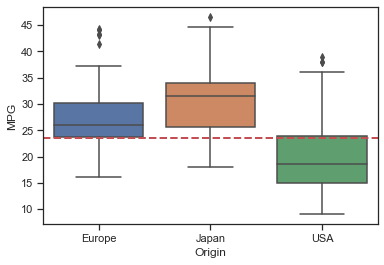

In [29]:
# Plot mpg distribution for cars from different countries of origin
fig, ax = plt.subplots()
ax = sns.boxplot(x='Origin', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.savefig(os.path.join(figdir, 'auto-mpg-origin-boxplot.pdf'))
plt.show()

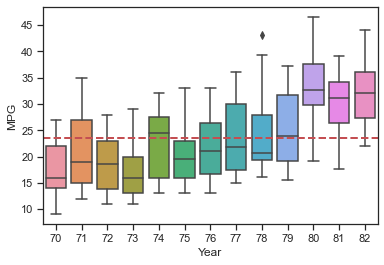

In [30]:
# Plot mpg distribution for cars from different years
data = pd.concat( [df['MPG'], df['Year']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Year', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.savefig(os.path.join(figdir, 'auto-mpg-year-boxplot.pdf'))
plt.show()